In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
from google.colab import files


# Assuming the file name is asd_data.csv
df = pd.read_csv('/content/sample_data/Filtered_Phenotypic_Data.csv')

# Display the first few rows of the dataset
df.head()





,SUB_ID,FILE_ID,AGE_AT_SCAN,DX_GROUP,anat_cnr,anat_efc,anat_fber,anat_fwhm,anat_qi1,anat_snr,func_efc,func_fber,func_fwhm,func_dvars,func_outlier,func_quality,func_mean_fd,func_gsr,qc_rater_1
0,50004,Pitt_0050004,19.09,1,7.698144,1.226218,9.725750,3.881684,0.174186,9.323463,0.578960,63.317943,1.866104,1.180605,0.008262,0.014260,0.127745,0.046745,OK
1,50005,Pitt_0050005,13.73,1,9.071807,1.256278,11.198226,3.628667,0.119269,10.814200,0.556064,70.800354,1.918278,1.092030,0.001711,0.019205,0.128136,0.027963,OK
2,50006,Pitt_0050006,13.37,1,8.026798,1.407166,6.282055,3.674539,0.130647,10.123574,0.562942,75.364679,2.213873,1.086830,0.001500,0.006919,0.070143,0.054006,OK
3,50007,Pitt_0050007,17.78,1,5.775897,1.161231,6.991093,4.104707,0.236214,7.638746,0.607554,64.682109,1.834521,1.099380,0.002805,0.028284,0.151246,0.055615,OK
4,50008,Pitt_0050008,32.45,1,6.669686,1.241491,7.945937,3.831462,0.131733,8.507972,0.571447,60.682083,1.909622,1.038369,0.000524,0.018028,0.169275,0.056363,OK


In [ ]:
# Check for missing values
print(df.isnull().sum())


SUB_ID          0
FILE_ID         0
AGE_AT_SCAN     0
DX_GROUP        0
anat_cnr        0
anat_efc        0
anat_fber       0
anat_fwhm       0
anat_qi1        0
anat_snr        0
func_efc        0
func_fber       0
func_fwhm       0
func_dvars      0
func_outlier    0
func_quality    0
func_mean_fd    0
func_gsr        0
qc_rater_1      0
dtype: int64


In [ ]:
# Check the data types
df.dtypes
# Separate features (X) and target variable (y)
# Assuming 'DX_GROUP' is the target variable and rest are features
X = df.drop(columns=['DX_GROUP'])
y = df['DX_GROUP']

# Encode the target variable if it's categorical
# Convert categorical target variable to numeric codes
if y.dtype == 'object' or y.dtype.name == 'category':
    y = y.astype('category').cat.codes
# Display shapes of X and y
print('Features shape (X):', X.shape)
print('Target shape (y):', y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)




Features shape (X): (884, 18)
Target shape (y): (884,)
(707, 18) (177, 18) (707,) (177,)


In [ ]:
!pip install scikit-learn pandas

import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Assuming 'X_train' is a pandas DataFrame
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if column is of object (string) type
        label_encoders[col] = LabelEncoder()  # Create a new LabelEncoder for the column
        X_train[col] = label_encoders[col].fit_transform(X_train[col])  # Fit and transform the column

        X_train[col] = label_encoders[col].fit_transform(X_train[col])


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X_train' is a pandas DataFrame and 'y_train' is your target

# Define the imputer - fill numerical NaNs with mean and categorical NaNs with 'Unknown'
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')


In [ ]:
# Separate numerical and categorical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Impute the numerical columns
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Drop rows with NaN values
X_train = X_train.dropna()
# Ensure y_train has corresponding entries
y_train = y_train.loc[X_train.index]
# Encode categorical variables
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # Check if column is of object (string) type
        label_encoders[col] = LabelEncoder()
        X_train[col] = label_encoders[col].fit_transform(X_train[col])
# Fit the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)



RandomForestClassifier()

In [ ]:
# Encode categorical variables in X_test
for col in X_test.columns:
    if X_test[col].dtype == 'object':
# Use the same label encoder fitted on the training data
        if col in label_encoders:  # Check if the column was encoded in the training data
            X_test[col] = label_encoders[col].transform(X_test[col]) # Indent this line
        else:
            # Handle columns that were not present or were dropped in the training data
            pass # Add a placeholder to handle this case

In [ ]:
X_test[col] = X_test[col].fillna('Unknown') # Replace with a placeholder, or consider dropping the column if it's not relevant

In [ ]:
# Encode categorical variables in X_test
for col in X_test.columns:
    if X_test[col].dtype == 'object':
# Use the same label encoder fitted on the training data
        if col in label_encoders:  # Check if the column was encoded in the training data
            X_test[col] = label_encoders[col].transform(X_test[col])
        else:
            # Handle columns that were not present or were dropped in the training data
            X_test[col] = X_test[col].fillna('Unknown') # Replace with a placeholder, or consider dropping the column if it's not relevant
            label_encoders[col] = LabelEncoder() # Create a new encoder for this column
            X_test[col] = label_encoders[col].fit_transform(X_test[col]) # Encode the column

In [ ]:
# Fit the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Generate predictions on the test set
y_pred = rf_model.predict(X_test) # Add this line to generate predictions


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 72.32%


In [ ]:
# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)



Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.93      0.76        84
           2       0.89      0.54      0.67        93

    accuracy                           0.72       177
   macro avg       0.77      0.73      0.72       177
weighted avg       0.78      0.72      0.71       177



Confusion Matrix:
 [[78  6]
 [43 50]]


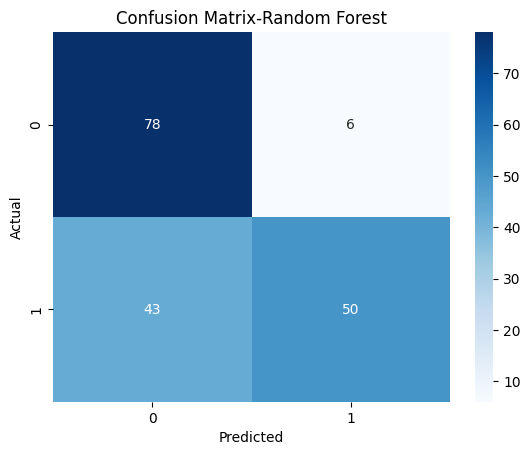

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-Random Forest')
plt.show()


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Calculate additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 70.62%
Precision: 0.7420356229220763
Recall: 0.7062146892655368
F1 Score: 0.6991943649570769


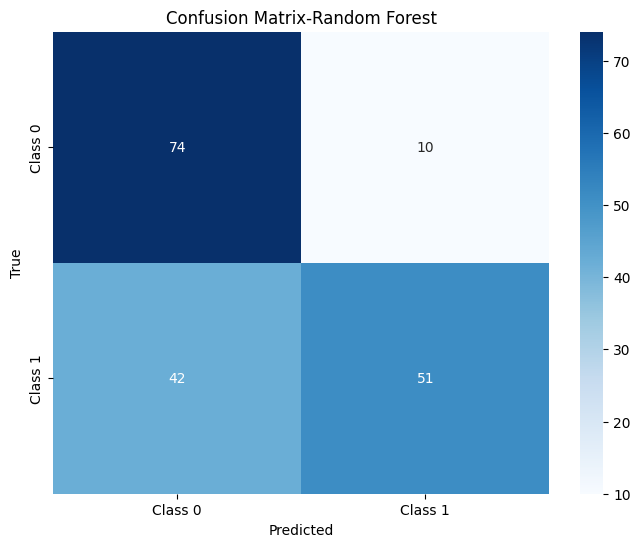

In [48]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-Random Forest')
plt.show()

In [49]:
# Accuracy Graph
train_sizes = np.linspace(0.1, 1.0, 10)
train_acc = []
test_acc = []

# Evaluate model on different training set sizes
for train_size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    rf_model.fit(X_train_part, y_train_part)
    train_acc.append(rf_model.score(X_train_part, y_train_part))
    test_acc.append(rf_model.score(X_test, y_test))

# Plot accuracy over different training sizes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_acc, label='Training Accuracy', marker='o')
plt.plot(train_sizes * 100, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Training and Testing Sets')
plt.legend()
plt.show()

ValueError: train_size=1.0 should be either positive and smaller than the number of samples 707 or a float in the (0, 1) range

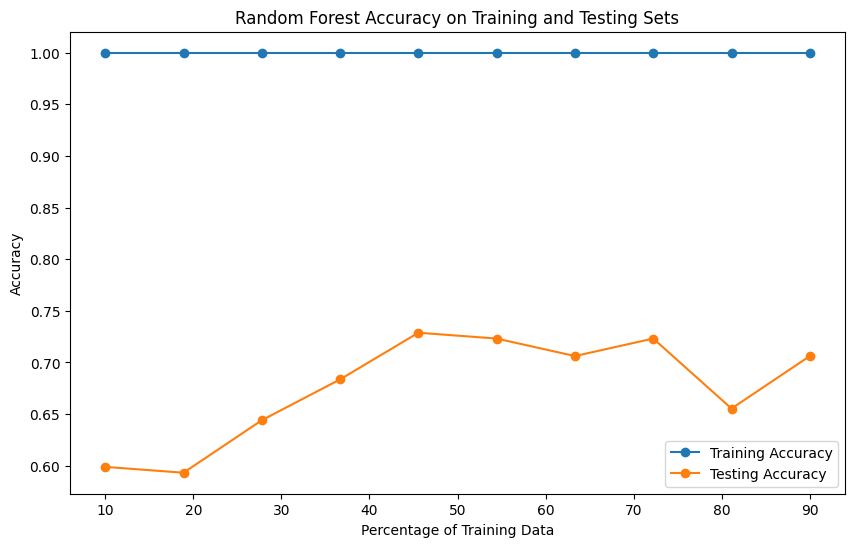

In [50]:
# Accuracy Graph
train_sizes = np.linspace(0.1, 0.9, 10)  # Change the upper limit to 0.9
train_acc = []
test_acc = []

# Evaluate model on different training set sizes
for train_size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
    rf_model.fit(X_train_part, y_train_part)
    train_acc.append(rf_model.score(X_train_part, y_train_part))
    test_acc.append(rf_model.score(X_test, y_test))

# Plot accuracy over different training sizes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_acc, label='Training Accuracy', marker='o')
plt.plot(train_sizes * 100, test_acc, label='Testing Accuracy', marker='o')
plt.xlabel('Percentage of Training Data')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy on Training and Testing Sets')
plt.legend()
plt.show()